In [1]:
## Import packages

import numpy as np
import pandas as pd
from scipy.stats import zscore

import matplotlib.pylab as plt
import seaborn as sns; sns.set() 
%matplotlib inline

### 1. EDA And Preprocessing the data set

In [2]:
cars_mpg_df=pd.read_csv("cars-dataset.csv")
cars_mpg_df.head()

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150,3433,12.0,70,16.0
4,ford torino,8,302.0,140,3449,10.5,70,17.0


In [3]:
cars_mpg_df.shape

(398, 8)

In [4]:
cars_mpg_df.info()  ##no missing value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


In [5]:
cars_mpg_df.isna().count()

car name    398
cyl         398
disp        398
hp          398
wt          398
acc         398
yr          398
mpg         398
dtype: int64

In [6]:
cars_mpg_df.describe()
## Car name is missing since categorical variable.We may drop it is as well, for further analysis.
## But hp is also missing, lets explore further

,cyl,disp,wt,acc,yr,mpg
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,5.454774,193.425879,2970.424623,15.568090,76.010050,23.514573
std,1.701004,104.269838,846.841774,2.757689,3.697627,7.815984
min,3.000000,68.000000,1613.000000,8.000000,70.000000,9.000000
25%,4.000000,104.250000,2223.750000,13.825000,73.000000,17.500000
50%,4.000000,148.500000,2803.500000,15.500000,76.000000,23.000000
75%,8.000000,262.000000,3608.000000,17.175000,79.000000,29.000000
max,8.000000,455.000000,5140.000000,24.800000,82.000000,46.600000


In [7]:
cars_mpg_df["hp"].dtypes

dtype('O')

In [8]:
cars_mpg_df["hp"].unique() ## we see '?' in below values, rest are numerical values, let replace that.

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [9]:
cars_mpg_df[cars_mpg_df["hp"]=="?"]["hp"].replace() ## to See where exactly we have ?

32     ?
126    ?
330    ?
336    ?
354    ?
374    ?
Name: hp, dtype: object

In [10]:
cars_mpg_df["hp"].describe()

count     398
unique     94
top       150
freq       22
Name: hp, dtype: object

In [11]:
##Replace them with "nan"
#Replace them with nan and remove the records from the data frame that have "nan"
cars_mpg_df = cars_mpg_df.replace('?', np.nan)

In [12]:
#Getting those records with nan
cars_mpg_df[cars_mpg_df.isnull().any(axis=1)]

,car name,cyl,disp,hp,wt,acc,yr,mpg
32,ford pinto,4,98.0,NaN,2046,19.0,71,25.0
126,ford maverick,6,200.0,NaN,2875,17.0,74,21.0
330,renault lecar deluxe,4,85.0,NaN,1835,17.3,80,40.9
336,ford mustang cobra,4,140.0,NaN,2905,14.3,80,23.6
354,renault 18i,4,100.0,NaN,2320,15.8,81,34.5
374,amc concord dl,4,151.0,NaN,3035,20.5,82,23.0


In [13]:
cars_mpg_df.median()

cyl        4.0
disp     148.5
wt      2803.5
acc       15.5
yr        76.0
mpg       23.0
dtype: float64

In [14]:
# replace the missing values in 'hp' with median value of 'hp' 
cars_mpg_df_numerical= cars_mpg_df.drop("car name" , axis=1)
cars_mpg_df_numerical = cars_mpg_df_numerical.apply(lambda x: x.fillna(x.median()),axis=0)


In [15]:
cars_mpg_df_numerical.dtypes  ## Hp has filled up missing value with median.but is still Object type

cyl       int64
disp    float64
hp       object
wt        int64
acc     float64
yr        int64
mpg     float64
dtype: object

In [16]:
cars_mpg_df_numerical['hp'] = cars_mpg_df_numerical['hp'].astype('float64')  # converting the hp column from object / string type to float


In [17]:
cars_mpg_df_numerical.describe().T  ## Now the result include "hp" column too

,count,mean,std,min,25%,50%,75%,max
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
hp,398.0,104.304020,38.222625,46.0,76.000,93.5,125.000,230.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6


In [18]:
# Separating nonnumeric column from numerics
carname_df=cars_mpg_df.pop("car name");

#Standardising the numerical values
cars_mpg_df_numerical = cars_mpg_df_numerical.apply(zscore)

# joining all columns again
cars_mpg_df=cars_mpg_df_numerical.join(carname_df)
cars_mpg_df.head()

,cyl,disp,hp,wt,acc,yr,mpg,car name
0,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426,-0.706439,chevrolet chevelle malibu
1,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426,-1.090751,buick skylark 320
2,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426,-0.706439,plymouth satellite
3,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426,-0.962647,amc rebel sst
4,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426,-0.834543,ford torino


### 2. Using pair plot and corr matrix to visualize how the different variables are related 

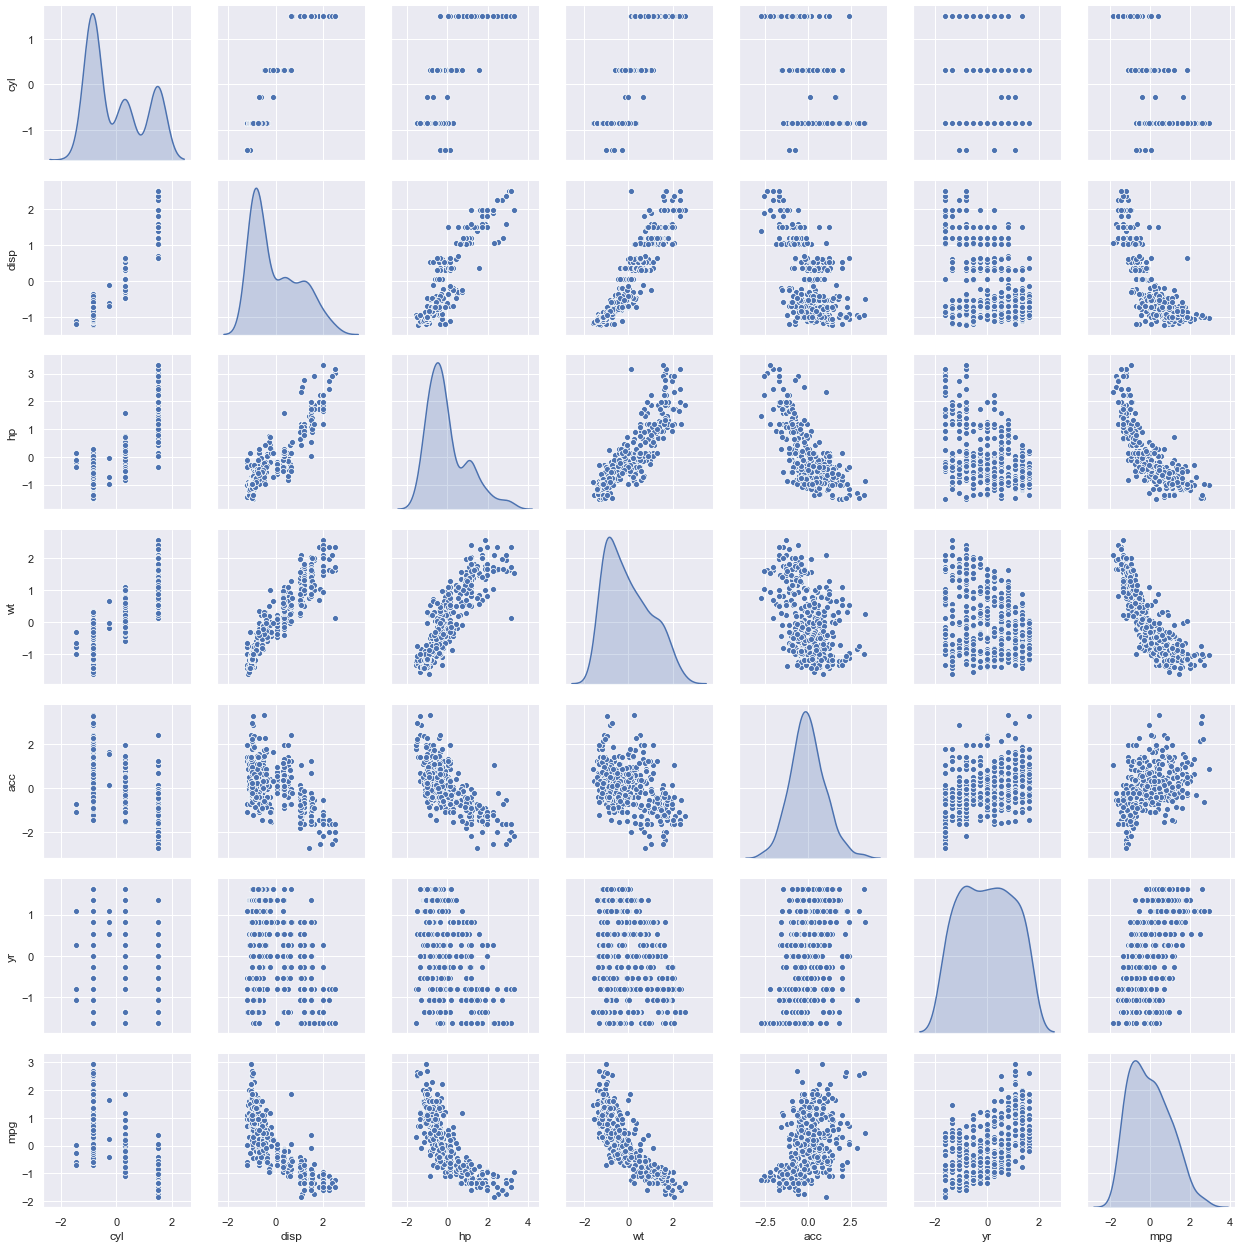

In [19]:
sns.pairplot(cars_mpg_df,diag_kind='kde')

## we can see the positive linear inter relations between, {disp and hp} ,{disp and wt} , {hp and wt}
## and negative relation between {disp and acc}, {disp and mpg}, {hp and mpg},{wt and mpg}.

## Also, It can be seen in below that there is no relation between acc and mpg(which is the target column here.)

#### Note: 
#### From above gaussian distributions, we can see the diagonals that some of them have clear 3 peaks whereas some have 2 clearly visible peaks and 1 or more mild peaks.  
#### Hence we may say, that there can be at max 3 peaks possible.  so, We should look for 2 to 3 clusters atleast. Also, we may restrict our Kmean clustering for k=2 to 6.

In [20]:
cars_mpg_df.corr()
## the corr matrix shows , mpg has got good corr(i.e. >0.5) with cyl,disp, hp,wt and yr

,cyl,disp,hp,wt,acc,yr,mpg
cyl,1.000000,0.950721,0.841284,0.896017,-0.505419,-0.348746,-0.775396
disp,0.950721,1.000000,0.895778,0.932824,-0.543684,-0.370164,-0.804203
hp,0.841284,0.895778,1.000000,0.862442,-0.686590,-0.413733,-0.773453
wt,0.896017,0.932824,0.862442,1.000000,-0.417457,-0.306564,-0.831741
acc,-0.505419,-0.543684,-0.686590,-0.417457,1.000000,0.288137,0.420289
yr,-0.348746,-0.370164,-0.413733,-0.306564,0.288137,1.000000,0.579267
mpg,-0.775396,-0.804203,-0.773453,-0.831741,0.420289,0.579267,1.000000


### 3. Use K Means or Hierarchical clustering to find out the optimal no of clusters in the data. Identify and separate the clusters

In [21]:
from sklearn.cluster import KMeans
#cars_mpg_df=cars_mpg_df.drop("car name" , axis=1)
#cars_mpg_df.head()

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

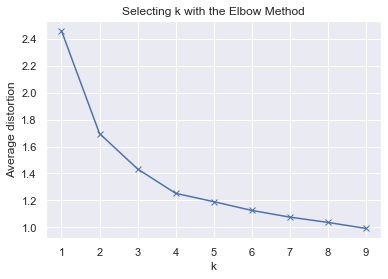

In [22]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(cars_mpg_df_numerical)
    prediction=model.predict(cars_mpg_df_numerical)
    meanDistortions.append(sum(np.min(cdist(cars_mpg_df_numerical, model.cluster_centers_, 'euclidean'), axis=1)) / cars_mpg_df_numerical.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')


#### Though the bend is not coming out clearly as there are many bends, let us look at 2 to 6 clusters one by one.

In [23]:
# Let us first start with K = 2
final_model=KMeans(2)
final_model.fit(cars_mpg_df_numerical)
prediction=final_model.predict(cars_mpg_df_numerical)

#Append the prediction 
cars_mpg_df["GROUP_2"] = prediction
print("Groups Assigned : \n")
cars_mpg_df[["car name", "GROUP_2"]].head()

Groups Assigned : 



,car name,GROUP_2
0,chevrolet chevelle malibu,0
1,buick skylark 320,0
2,plymouth satellite,0
3,amc rebel sst,0
4,ford torino,0


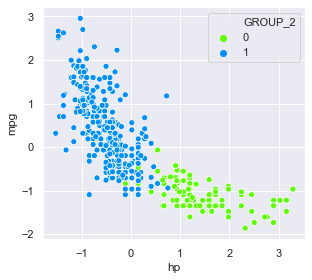

In [24]:
sns.set(rc={'figure.figsize':(4.7,4.27)})
sns.scatterplot(x=cars_mpg_df['hp'], y=cars_mpg_df['mpg'], hue=cars_mpg_df['GROUP_2'], palette='gist_rainbow')

Groups Assigned : 



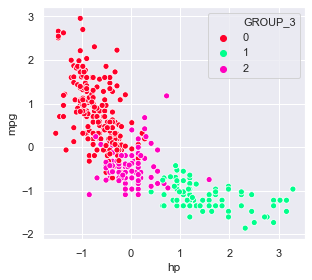

In [25]:
# Let us first start with K = 3
final_model=KMeans(3)
final_model.fit(cars_mpg_df_numerical)
prediction=final_model.predict(cars_mpg_df_numerical)

#Append the prediction 
cars_mpg_df["GROUP_3"] = prediction
print("Groups Assigned : \n")
cars_mpg_df[["car name", "GROUP_3"]].head()

sns.set(rc={'figure.figsize':(4.7,4.27)})
sns.scatterplot(x=cars_mpg_df['hp'], y=cars_mpg_df['mpg'], hue=cars_mpg_df['GROUP_3'], palette='gist_rainbow')

Groups Assigned : 



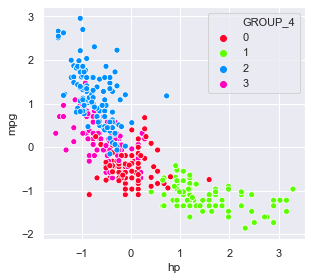

In [26]:
# Let us first start with K = 4
final_model=KMeans(4)
final_model.fit(cars_mpg_df_numerical)
prediction=final_model.predict(cars_mpg_df_numerical)

#Append the prediction 
cars_mpg_df["GROUP_4"] = prediction
print("Groups Assigned : \n")
cars_mpg_df[["car name", "GROUP_4"]].head()

sns.set(rc={'figure.figsize':(4.7,4.27)})
sns.scatterplot(x=cars_mpg_df['hp'], y=cars_mpg_df['mpg'], hue=cars_mpg_df['GROUP_4'], palette='gist_rainbow')

Groups Assigned : 



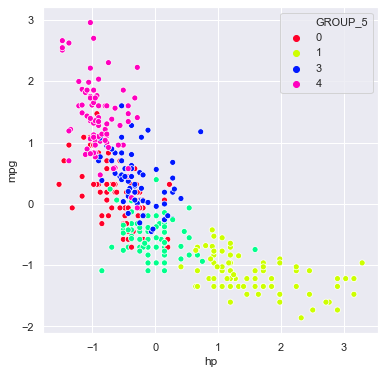

In [27]:
# Let us first start with K = 5
final_model=KMeans(5)
final_model.fit(cars_mpg_df_numerical)
prediction=final_model.predict(cars_mpg_df_numerical)

#Append the prediction 
cars_mpg_df["GROUP_5"] = prediction
print("Groups Assigned : \n")
cars_mpg_df[["car name", "GROUP_5"]].head()

sns.set(rc={'figure.figsize':(6,6)})
sns.scatterplot(x=cars_mpg_df['hp'], y=cars_mpg_df['mpg'], hue=cars_mpg_df['GROUP_5'], palette='gist_rainbow')

Groups Assigned : 



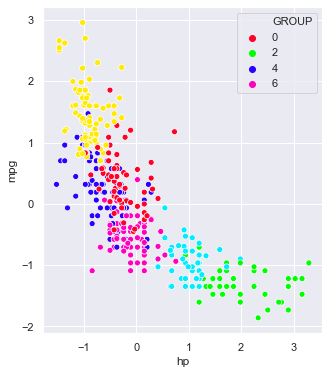

In [28]:
# Let us first start with K = 6
final_model=KMeans(6)
final_model.fit(cars_mpg_df_numerical)
prediction=final_model.predict(cars_mpg_df_numerical)

#Append the prediction 
cars_mpg_df["GROUP"] = prediction
print("Groups Assigned : \n")
cars_mpg_df[["car name", "GROUP"]].head()

sns.set(rc={'figure.figsize':(5,6)})
sns.scatterplot(x=cars_mpg_df['hp'], y=cars_mpg_df['mpg'], hue=cars_mpg_df['GROUP'], palette='gist_rainbow')

#### After comparing various clusters, for k=2 to 6, we can see that the clusters has been most tight within clusters and distnt from each other, at k=3.
#### For k>3 , we see overlapping among clusters. Hence we will group the into 3 clusters only.

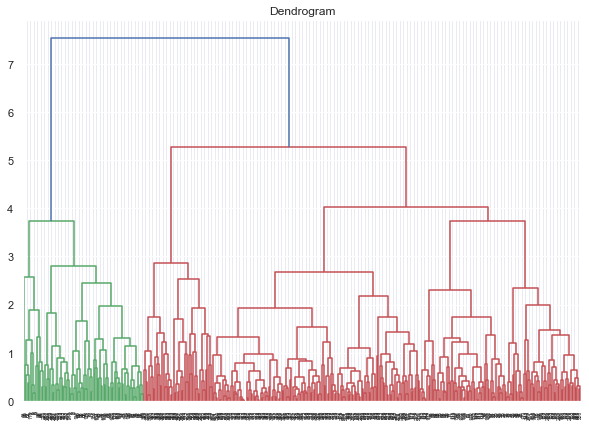

In [29]:
##Visualising k=3 using Heirarical clustering algo too.

import scipy.cluster.hierarchy as shc
shc1=shc.linkage(cars_mpg_df[['cyl', 'disp', 'hp', 'wt', 'yr']].values, method='complete')
plt.figure(figsize=(10,7))
plt.title('Dendrogram')
dend = shc.dendrogram(shc1)

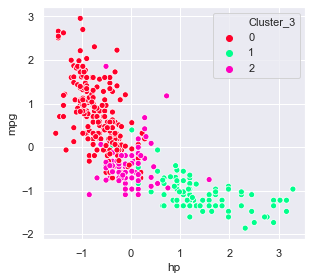

In [30]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=3)
cars_mpg_df['Cluster_3'] = ac.fit_predict(cars_mpg_df[['cyl', 'disp', 'hp', 'wt', 'yr']].values)
sns.set(rc={'figure.figsize':(4.7,4.27)})
sns.scatterplot(x=cars_mpg_df['hp'], y=cars_mpg_df['mpg'], hue=cars_mpg_df['Cluster_3'], palette='gist_rainbow')

In [31]:
cars_mpg_df.head()

,cyl,disp,hp,wt,acc,yr,mpg,car name,GROUP_2,GROUP_3,GROUP_4,GROUP_5,GROUP,Cluster_3
0,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426,-0.706439,chevrolet chevelle malibu,0,1,1,1,3,1
1,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426,-1.090751,buick skylark 320,0,1,1,1,2,1
2,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426,-0.706439,plymouth satellite,0,1,1,1,2,1
3,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426,-0.962647,amc rebel sst,0,1,1,1,2,1
4,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426,-0.834543,ford torino,0,1,1,1,2,1


In [32]:
cars_mpg_df=cars_mpg_df.drop(["GROUP_2", "GROUP_4", "GROUP_5", "GROUP","GROUP_3"],axis=1)
cars_mpg_df.head()

,cyl,disp,hp,wt,acc,yr,mpg,car name,Cluster_3
0,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426,-0.706439,chevrolet chevelle malibu,1
1,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426,-1.090751,buick skylark 320,1
2,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426,-0.706439,plymouth satellite,1
3,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426,-0.962647,amc rebel sst,1
4,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426,-0.834543,ford torino,1


In [33]:
cluster_count = cars_mpg_df.groupby("Cluster_3")["car name"].count()
cluster_count   ## number of records in each of 3 cluster is this.

Cluster_3
0    212
1    103
2     83
Name: car name, dtype: int64

### Separating the 3 clusters  records from orignal data frame

In [34]:
by_state=cars_mpg_df.groupby("Cluster_3")
by_state.groups[0]  ## returns indexes of rows clusterred to cluster 0.

Int64Index([ 14,  18,  19,  20,  21,  22,  23,  29,  30,  31,
            ...
            385, 388, 390, 391, 392, 393, 394, 395, 396, 397],
           dtype='int64', length=212)

In [35]:
## finding the records in car_mpg_df that has been allocated to cluster 0
car_mpg_cluster_0_df=by_state.get_group(0)
car_mpg_cluster_0_df.head()


,cyl,disp,hp,wt,acc,yr,mpg,car name,Cluster_3
14,-0.856321,-0.772295,-0.243723,-0.707544,-0.206262,-1.627426,0.062185,toyota corona mark ii,0
18,-0.856321,-0.925936,-0.427091,-0.993671,-0.387801,-1.627426,0.446497,datsun pl510,0
19,-0.856321,-0.925936,-1.527300,-1.342463,1.790672,-1.627426,0.318393,volkswagen 1131 deluxe sedan,0
20,-0.856321,-0.801103,-0.453287,-0.352841,0.701436,-1.627426,0.190289,peugeot 504,0
21,-0.856321,-0.829911,-0.374700,-0.638968,-0.387801,-1.627426,0.062185,audi 100 ls,0


In [36]:
## Similarly, finding the records in car_mpg_df that has been allocated to cluster 1, 2

car_mpg_cluster_1_df=by_state.get_group(1)
car_mpg_cluster_2_df=by_state.get_group(2)

print("cluster_0 shape:",car_mpg_cluster_0_df.shape)
print("cluster_1 shape:",car_mpg_cluster_1_df.shape)
print("cluster_2 shape:",car_mpg_cluster_2_df.shape)

cluster_0 shape: (212, 9)
cluster_1 shape: (103, 9)
cluster_2 shape: (83, 9)


### 4.Using linear regression model on different clusters separately and printing the coefficients of the models individually 

In [37]:
print("For Cluster 0,")

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Since 'mpg' is dependent variable drop it
X_cluster0 = car_mpg_cluster_0_df.drop(['mpg','car name'], axis=1)
y_cluster0 = car_mpg_cluster_0_df[['mpg']]

X_train, X_test, y_train, y_test = train_test_split(X_cluster0, y_cluster0, test_size=0.30, random_state=1)

regression_model0 = LinearRegression()
regression_model0.fit(X_train, y_train)

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model0.coef_[0][idx]))


For Cluster 0,
The coefficient for cyl is 1.0837721097059905
The coefficient for disp is -0.6056805297417206
The coefficient for hp is -0.2840100937280796
The coefficient for wt is -0.6526852615986051
The coefficient for acc is -0.04127076183932739
The coefficient for yr is 0.4316978059912911
The coefficient for Cluster_3 is 0.0


In [38]:
print("For Cluster 1,")

# Since 'mpg' is dependent variable drop it
X_cluster1 = car_mpg_cluster_1_df.drop(['mpg','car name'], axis=1)

# Copy the 'mpg' column alone into the y dataframe. This is the dependent variable
y_cluster1 = car_mpg_cluster_1_df[['mpg']]

X_train, X_test, y_train, y_test = train_test_split(X_cluster1, y_cluster1, test_size=0.30, random_state=1)

regression_model1 = LinearRegression()
regression_model1.fit(X_train, y_train)

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model1.coef_[0][idx]))


For Cluster 1,
The coefficient for cyl is 0.0
The coefficient for disp is 0.28981380032001625
The coefficient for hp is -0.17305072983895387
The coefficient for wt is -0.30789645732665427
The coefficient for acc is 0.08227918852587235
The coefficient for yr is 0.12995738655643121
The coefficient for Cluster_3 is 0.0


In [39]:
print("For Cluster 2,")

# Since 'mpg' is dependent variable drop it
X_cluster2 = car_mpg_cluster_2_df.drop(['mpg','car name'], axis=1)

# Copy the 'mpg' column alone into the y dataframe. This is the dependent variable
y_cluster2 = car_mpg_cluster_2_df[['mpg']]

X_train, X_test, y_train, y_test = train_test_split(X_cluster2, y_cluster2, test_size=0.30, random_state=1)

regression_model2 = LinearRegression()
regression_model2.fit(X_train, y_train)

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model2.coef_[0][idx]))


For Cluster 2,
The coefficient for cyl is 0.0
The coefficient for disp is 0.262767631176389
The coefficient for hp is -0.18038515814217557
The coefficient for wt is -0.650457784639799
The coefficient for acc is -0.12130123964063355
The coefficient for yr is 0.31886287937943364
The coefficient for Cluster_3 is 0.0
